In [1]:
%matplotlib inline

## NetworkX Introduction

Next, let's look at some simple networks in NetworkX.  First, we need to **import** the <a href="https://networkx.github.io/">NetworkX</a> package. If we alias it as "nx", we can save some typing:

In [2]:
import networkx as nx  
import random as rand
import pylab as plt

### Simple graph
To start, we can create a simple un-directed graph:

In [3]:
g = nx.DiGraph()
type(g)

networkx.classes.digraph.DiGraph

And add some nodes and edges using the add_node and add_edge methods:

In [4]:
g.add_node(1)
g.add_node(2)
g.add_node(3)
g.nodes()

[1, 2, 3]

In [5]:
g.add_edge(1,2)
g.add_edge(2,3)
g.add_edge(3,1)
g.add_edge(1,3)
print (g.edges())

[(1, 2), (1, 3), (2, 3), (3, 1)]


Now let's draw it with the matplotlib and networkx libraries:

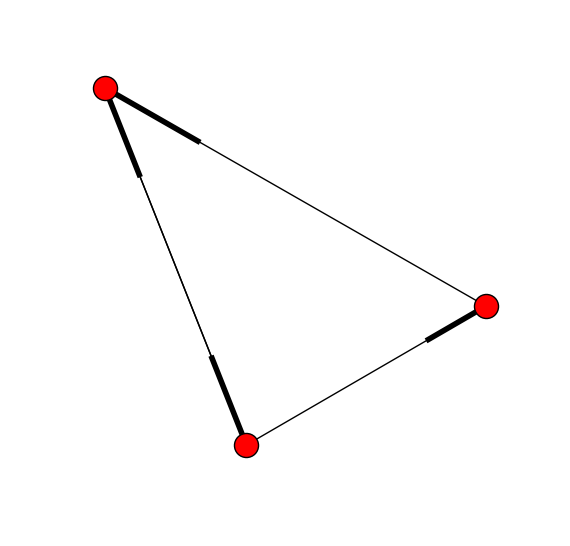

In [6]:
plt.rcParams['figure.figsize'] = (5.0, 5.0)  # Sets the plot output size
nx.draw(g)
plt.show()  

### Adding Data

Nodes and edges can each have data asssociated with them.  NetworkX does this by associating a dictionary with each element, so, for example, we can call the same add_node / add_edge functions with a data attribute.

Let's start again with an empty graph:

In [7]:
g = nx.Graph()

...and substitute state names and populations for integers:

In [8]:
g.add_node("California", { "population": 38332521})
g.add_node("New York", { "population": 26448193})
g.add_node("Texas", { "population": 19651127})

Let's look at the new nodes:

In [10]:
print (g.nodes())
print (g.nodes(data=True)) # Note the data parameters tells networkx to include the node's data in the returned value.

['California', 'New York', 'Texas']
[('California', {'population': 38332521}), ('New York', {'population': 26448193}), ('Texas', {'population': 19651127})]


And we can do the same thing with edges - how about 2014 interstate migration (from

https://www.census.gov/hhes/migration/data/acs/state-to-state.html):

In [11]:
g.add_edge('New York', 'California', { "net migration": 7171})
g.add_edge('New York', 'Texas', { "net migration": 6810 })
g.add_edge("Texas", "California", { "net migration": 34028 } )
print (g.edges(data=True))

[('California', 'New York', {'net migration': 7171}), ('California', 'Texas', {'net migration': 34028}), ('New York', 'Texas', {'net migration': 6810})]


Now let's try including this information in our diagram.  For more information on network drawing options, see:

https://networkx.readthedocs.org/en/stable/tutorial/tutorial.html#drawing-graphs


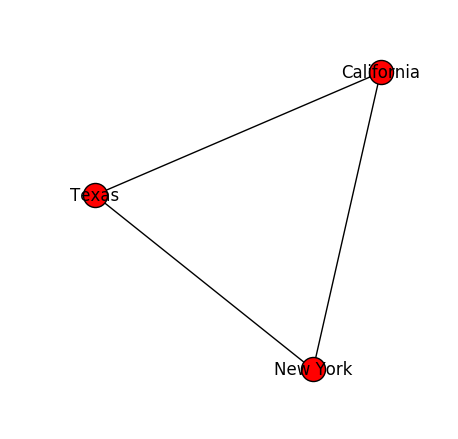

In [12]:
plt.rcParams['figure.figsize'] = (4.0, 4.0)
nx.draw(g, with_labels=True)
plt.show()

Adding node sizes:

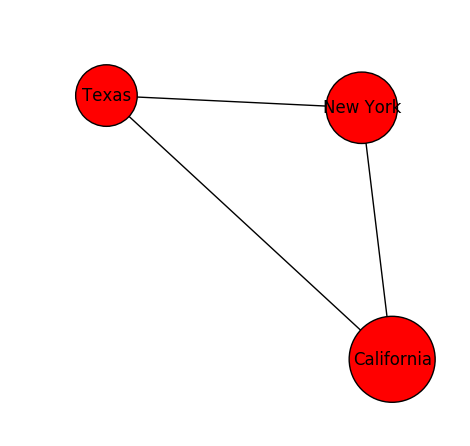

In [13]:
sizes = [n[1]["population"]/10000.0 for n in g.nodes(data=True)]
nx.draw(g, with_labels=True, node_size=sizes)
plt.show()

Adding line weights:

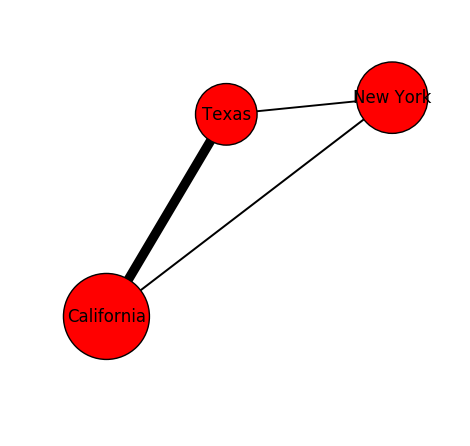

In [14]:
widths = [m[2]["net migration"]/5000 for m in g.edges(data=True)]
nx.draw(g, with_labels=True, node_size=sizes, width=widths)
plt.show()

### Getting Data Out of NetworkX

Usually NetworkX is used in combination with external data sources, both for input and for output. 

For output, NetworkX supports commonly-used graph formats that can be used by software like <a href="https://gephi.org/">__Gephi__</a>, which is designed for manipulating graphs. Exporting to these formats is simply a matter of calling the applicable NetworkX function.  A list of them is available here:

http://networkx.readthedocs.org/en/stable/reference/convert.html

http://networkx.readthedocs.org/en/stable/reference/readwrite.html

Here's an example of a random graph (more on this later), output to a file:

In [15]:
g = nx.erdos_renyi_graph(10, 0.2)
nx.write_gexf(g, "my_network_file.gefx")

Let's look at the contents of the gefx format:

In [16]:
with open('my_network_file.gefx','r') as f:
    print (f.read())

<?xml version='1.0' encoding='utf-8'?>
<gexf version="1.1" xmlns="http://www.gexf.net/1.1draft" xmlns:viz="http://www.gexf.net/1.1draft/viz" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xsi:schemaLocation="http://www.w3.org/2001/XMLSchema-instance">
  <graph defaultedgetype="undirected" mode="static">
    <nodes>
      <node id="0" label="0" />
      <node id="1" label="1" />
      <node id="2" label="2" />
      <node id="3" label="3" />
      <node id="4" label="4" />
      <node id="5" label="5" />
      <node id="6" label="6" />
      <node id="7" label="7" />
      <node id="8" label="8" />
      <node id="9" label="9" />
    </nodes>
    <edges>
      <edge id="0" source="2" target="9" />
      <edge id="1" source="2" target="4" />
      <edge id="2" source="2" target="6" />
      <edge id="3" source="3" target="4" />
      <edge id="4" source="4" target="8" />
      <edge id="5" source="4" target="6" />
      <edge id="6" source="5" target="6" />
      <edge id="7" sour

Reading is then a matter of calling the corresponding read function:

In [17]:
g2 = nx.read_gexf("my_network_file.gefx")
print ([n for n in nx.generate_edgelist(g2)])

["8 4 {'id': '4'}", "4 2 {'id': '1'}", "4 6 {'id': '5'}", "4 3 {'id': '3'}", "2 6 {'id': '2'}", "2 9 {'id': '0'}", "6 5 {'id': '6'}", "7 5 {'id': '7'}"]


We can also use NetworkX to convert between different representations of graphs, for example:

In [18]:
# A dictionary of dictionarys:
print (nx.to_dict_of_dicts(g2))

{'8': {'4': {'id': '4'}}, '4': {'8': {'id': '4'}, '2': {'id': '1'}, '6': {'id': '5'}, '3': {'id': '3'}}, '1': {}, '2': {'4': {'id': '1'}, '6': {'id': '2'}, '9': {'id': '0'}}, '0': {}, '6': {'2': {'id': '2'}, '4': {'id': '5'}, '5': {'id': '6'}}, '7': {'5': {'id': '7'}}, '3': {'4': {'id': '3'}}, '9': {'2': {'id': '0'}}, '5': {'7': {'id': '7'}, '6': {'id': '6'}}}


In [19]:
# A dictionary of lists:
print (nx.to_dict_of_lists(g2))

{'8': ['4'], '4': ['8', '2', '6', '3'], '1': [], '2': ['6', '4', '9'], '0': [], '6': ['2', '4', '5'], '7': ['5'], '3': ['4'], '9': ['2'], '5': ['6', '7']}


In [20]:
# A numpy array:
import numpy as np
print (nx.to_numpy_matrix(g))

[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  1.  0.  0.  1.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  1.  0.  0.  1.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  1.  0.  0.]
 [ 0.  0.  1.  0.  1.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]]


Converting to numpy matrixes exposes data embedded in networkx to further analsysis and explration via matrix operations.  See Newman chapter 11 for a good introduction.

### Getting data into NetworkX

Data import works similarly if the data is already in a graph-compatible format.  But, often, you may be working with tabular data, which can often be translated directly into nodes and edges.   

For example, the file state_to_state.txt contains tab-delimited data on the amount of grant funding flowing between states in 2009.  Let's take a look at the contents:

In [22]:
with open('state_to_state.txt','r') as f:
    print (f.read())

New York	43.00035	-75.4999	3020199292	New York	43.00035	-75.4999
California	37.25022	-119.75126	2180245687	California	37.25022	-119.75126
Texas	31.25044	-99.25061	826329961	Texas	31.25044	-99.25061
Michigan	44.25029	-85.50033	467143590	Michigan	44.25029	-85.50033
New York	43.00035	-75.4999	422650171	District of Columbia	38.91706	-77.00025
Washington	47.50012	-120.50147	415292942	District of Columbia	38.91706	-77.00025
Illinois	40.00032	-89.25037	413811074	Illinois	40.00032	-89.25037
Georgia	32.75042	-83.50018	402077285	Georgia	32.75042	-83.50018
Pennsylvania	40.27245	-76.90567	397070857	Pennsylvania	40.27245	-76.90567
Massachusetts	42.36565	-71.10832	360960934	Massachusetts	42.36565	-71.10832
Washington	47.50012	-120.50147	356881643	Washington	47.50012	-120.50147
Minnesota	46.25024	-94.25055	352821092	Minnesota	46.25024	-94.25055
Ohio	40.25034	-83.00018	336705228	Ohio	40.25034	-83.00018
Florida	28.75054	-82.5001	333037642	Florida	28.75054	-82.5001
Missouri	38.25031	-92.50046	326160934	

This is simply the result of a SQL group-by.  Output from SQL queries can often be interpreted as edge lists straightforwardly.  It is simply a matter of choosing which attributes are nodes, and which are edges.  Typically, the nodes would be the group-by columns, and the edges would be determined by co-occurrence in the same row, and edge attributes by the results of aggregate functions.

    select item1, item2, sum(amount) from table group by item1, item2

### Displaying Graph Data

It's possible to alter parameters to draw more revealing graphs. Just by visualizing them, it's possible to glean interesting information from the data that is hard to get otherwise. Here are some examples from Foundation Maps:

https://raw.githubusercontent.com/gmg444/dgd2016/master/Constellations_ClimateChangeCalifornia.png

https://raw.githubusercontent.com/gmg444/dgd2016/master/Constellations_EducationIndia.png

https://raw.githubusercontent.com/gmg444/dgd2016/master/Constellations_DetroitPerformingArts.png

The next important decision after which are nodes and which are edges, are which tabular attributes are important to represent in the graph.  In this example, you can see that the edge amount and node location attributes are important for a visual representation:

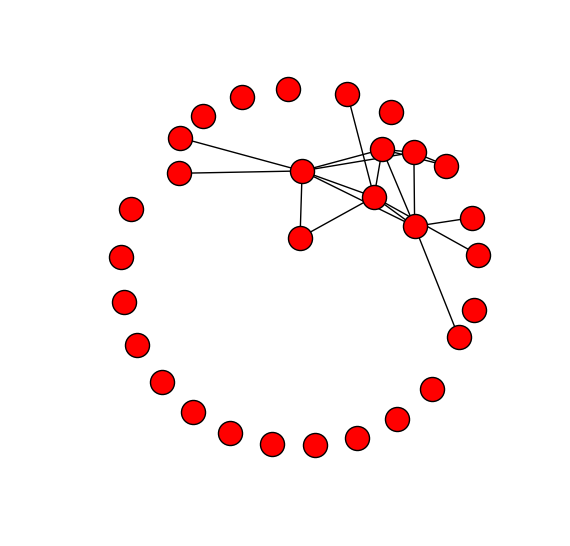

In [23]:
plt.rcParams['figure.figsize'] = (5.0, 5.0) 
with open("state_to_state.txt") as f:
    content = f.readlines()
g = nx.Graph()
for line in content:
    arr = line.replace("\n", "").split("\t") 
    g.add_node(arr[0], { "lat": float(arr[1]), "lon": float(arr[2]) })
    g.add_node(arr[4], { "lat": float(arr[5]), "lon": float(arr[6]) })
    amt = int(arr[3])
    g.add_edge(arr[0], arr[4], { "amount": amt })
#for n in g.nodes():
#    if n is None:
#        g.remove_node(n)
nx.draw(g)
plt.show()

Not very informative.... Specifying the position of the nodes and width of the edges from attribute data makes things much clearer:

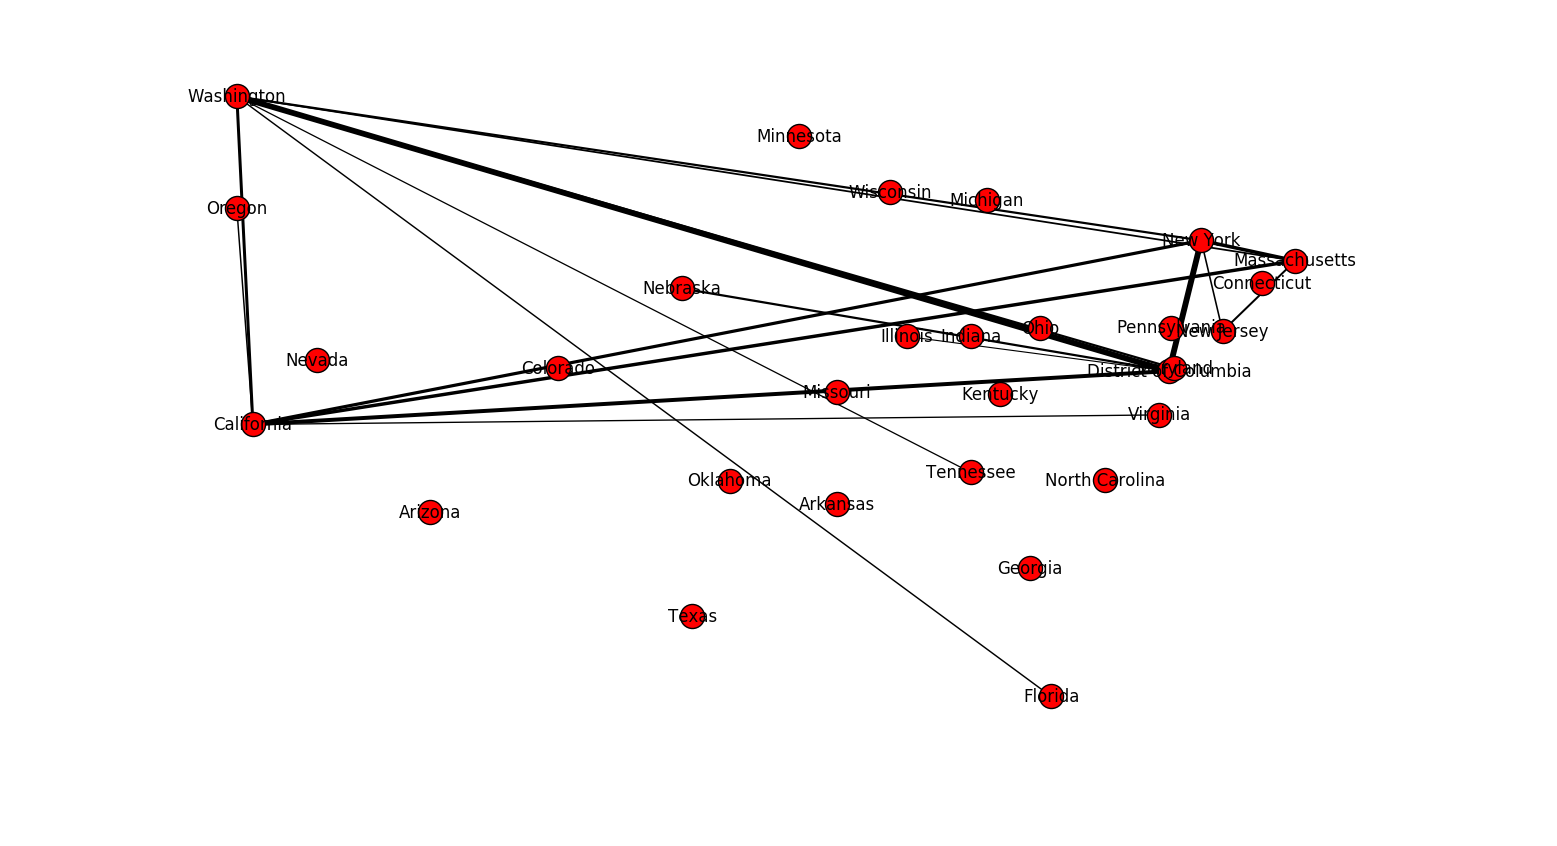

In [24]:
plt.rcParams['figure.figsize'] = (15.0, 8.0)

# print g.nodes(data=True)

position = {}
for n in g.nodes(data=True):
    if n[0] is None:
        continue
    position[n[0]] = [n[1].get('lon', 0), n[1].get('lat', 0)]
 
widths = [m[2]["amount"]/100000000 for m in g.edges(data=True)]
nx.draw(g, position, width=widths, with_labels=True)
plt.show()

### Interactive Visualization

Static visualizations can be problematic with network data. Dynamic and/or interactive visualizations can be more effective because they allow you to reduce the obscuring effect of multiple overlapping lines (the "hairball" effect). For example, this data represented as a static graph can be difficult to decipher.  It contains a the co-occurrence of different grant subjects among a set of grants.

In [26]:
with open('subject_to_subject.txt','r') as f:
    print (f.read())

ï»¿id1	label1	count	amount	id2	label2
SM	Agriculture, fishing and forestry	6	68250	SA	Arts and culture
SM	Agriculture, fishing and forestry	27	737430	SN	Community and economic development
SM	Agriculture, fishing and forestry	23	420045	SB	Education
SM	Agriculture, fishing and forestry	34	1568135	SC	Environment
SM	Agriculture, fishing and forestry	14	174000	SE	Health
SM	Agriculture, fishing and forestry	1	65000	SR	Human rights
SM	Agriculture, fishing and forestry	11	340000	SS	Human services
SM	Agriculture, fishing and forestry	6	260568	ST	International relations
SM	Agriculture, fishing and forestry	1	5000	SD	Philanthropy
SM	Agriculture, fishing and forestry	1	2500	SP	Religion
SM	Agriculture, fishing and forestry	1	226537	SF	Science
SM	Agriculture, fishing and forestry	4	23905	SQ	Sports and recreation
SA	Arts and culture	6	68250	SM	Agriculture, fishing and forestry
SA	Arts and culture	52	3051754	SN	Community and economic development
SA	Arts and culture	239	13479314	SB	Education
SA	Arts an

We can use the csv library to read the file into a dictionary:

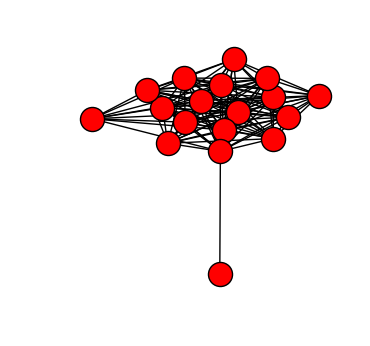

In [46]:
plt.rcParams['figure.figsize'] = (3.0, 3.0) 

import csv

g=nx.Graph()  #  Let's create an undirected graph to hold the 
with open('subject_to_subject.txt','r') as f:
    data = f.read()
reader = csv.DictReader(data.splitlines(), delimiter='\t')
for row in reader:
    g.add_edge(row["label1"], row["label2"], { "amount": row["amount"]})
nx.draw(g)
plt.show()

Whereas an interactive visualization of the same data can be easier to make sense of:

http://gis.foundationcenter.org/networkxd3/subject_chords.html

We use JavaScript / D3 for many visualizations. In this case the data was read directly into a javascript data structure for visualization in D3:

    d3.tsv("SubjectToSubject.txt", function(subjectToSubject){
        var i;
        var nodes = []
        var edges = []
        for(i=0; i<subjectToSubject.length; i++){
            if (nodes.indexOf(subjectToSubject[i].id1) < 0){
                nodes.push(subjectToSubject[i].id1);
            }
            var e = {};
            e["node1"] = subjectToSubject[i].id1    ;
            e["value"] = subjectToSubject[i].count;
            e["node2"] = subjectToSubject[i].id2;
            edges.push(e);
        }

        m = createMatrix(nodes, edges);
        visualize(m, nodes);
    });

However, like many JavaScript visulization tools, D3 works well with data in JSON format.  A typical JSON graph format contains two lists of objects - one of nodes, another of links, similar to the gefx format in XML.  Fortunately, NetworkX has built-in support for generating JSON data in this format:

In [47]:
import networkx as nx
from networkx.readwrite import json_graph
json_graph.node_link_data(g, attrs= dict(id='name',  source='source', target='target', key='key'))

{'directed': False,
 'graph': {},
 'links': [{'amount': '6200', 'source': 0, 'target': 1},
  {'amount': '40000', 'source': 0, 'target': 3},
  {'amount': '7000', 'source': 0, 'target': 11},
  {'amount': '50000', 'source': 0, 'target': 4},
  {'amount': '10000', 'source': 0, 'target': 16},
  {'amount': '466494', 'source': 0, 'target': 7},
  {'amount': '60000', 'source': 0, 'target': 5},
  {'amount': '400', 'source': 0, 'target': 13},
  {'amount': '403683', 'source': 0, 'target': 17},
  {'amount': '27629823', 'source': 1, 'target': 2},
  {'amount': '341500', 'source': 1, 'target': 3},
  {'amount': '653340', 'source': 1, 'target': 4},
  {'amount': '911517', 'source': 1, 'target': 5},
  {'amount': '2868915', 'source': 1, 'target': 6},
  {'amount': '3218380', 'source': 1, 'target': 7},
  {'amount': '417335', 'source': 1, 'target': 8},
  {'amount': '2578201', 'source': 1, 'target': 10},
  {'amount': '3679964', 'source': 1, 'target': 11},
  {'amount': '3341287', 'source': 1, 'target': 12},
  {'

Along related lines, a similarity matrix, where every node is connected to every other node by an edge with a distance or similarity measure, is indecipherable if there are too many nodes, as the number of edges is close to the square of the number of nodes:

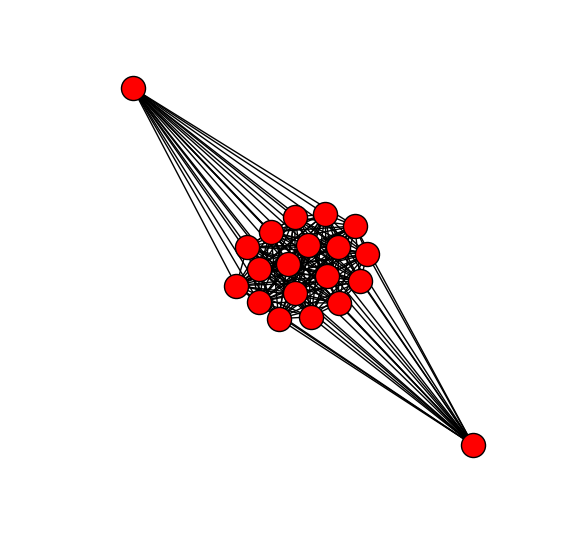

In [48]:
plt.rcParams['figure.figsize'] = (5.0, 5.0) 
g = nx.complete_graph(20)
pos=nx.spring_layout(g)
nx.draw(g, pos=pos)
plt.show()

Whereas an interactive matrix can be much easier to understand:

http://gis.foundationcenter.org/networkxd3/foundation_matrix.html

[test]: https://raw.githubusercontent.com/gmg444/dgd2016/master/Constellations_ClimateChangeCalifornia.png?raw=true

In this notebook we demonstrated some basic ways of getting data into and out of NetworkX graphs.  In the next section, we'll look at some different kinds of networks and measures that can be used to describe their structure.

### References

Aric A. Hagberg, Daniel A. Schult and Pieter J. Swart, “Exploring network structure, dynamics, and function using NetworkX”, in Proceedings of the 7th Python in Science Conference (SciPy2008), Gäel Varoquaux, Travis Vaught, and Jarrod Millman (Eds), (Pasadena, CA USA), pp. 11–15, Aug 2008

Bostock, Michael, Vadim Ogievetsky, and Jeffrey Heer. "D³ data-driven documents." Visualization and Computer Graphics, IEEE Transactions on 17.12 (2011): 2301-2309.

Brath, Richard, and David Jonker. Graph Analysis and Visualization: Discovering Business Opportunity in Linked Data. John Wiley & Sons, 2015.

### Network Measures

Scalar measures of graph structure can be useful for a few reasons:

<ul>
<li>They can help describe the structure of networks that are too big to visualize.</li>
<li>They make it easier to compare network structure over time.</li>
<li>The provide clues about the nature of the processes that created the graph data.</li>
</ul>

Unfortunately, no single number describes a network fully -- which ones are relevant depend on the perspective.  See for example this link for a list of some possible graph metrics:

https://reference.wolfram.com/language/guide/GraphMeasures.html

One thing that can be useful in considering different metrics is to look at a range of different network generation methods and see how the measures behave across those different methods.


Let's re-import everything to make sure we have the packages we need:

In [49]:
import networkx as nx 
import random as rand
import pylab as plt
import warnings # For Wakari only.
warnings.filterwarnings("ignore")

### Sample Networks

Networks from different domains come in different shapes and sizes.  Social networks, for exmaple, tend to have different structures than transportation networks or trophic networks in ecology.  Let's use NetworkX to generate some sample graphs to get a sense of some fo the possiblities.

Graphs with many different properties can be generated by NetworkX functions. A list is here:

https://networkx.github.io/documentation/networkx-1.10/reference/generators.html. 

But let's start creating them from scratch to get a sense of how some of the different graph metrics work.


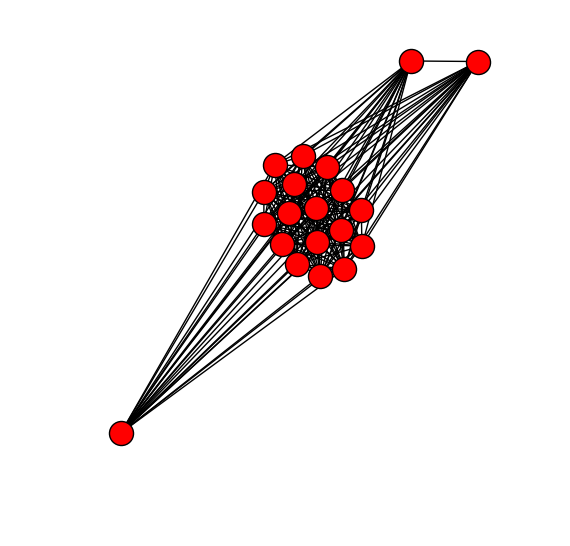

In [50]:
plt.rcParams['figure.figsize'] = (5.0, 5.0)  # This sets the width of the plots.
g = nx.Graph()
n = 20
g.add_nodes_from(range(n))
for i in range(n):
    for j in range(n):
        if i != j:
            g.add_edge(i, j) # Note that, for un-directed graphs (the default), 
                             # adding an edge j,i to a graph that already includes 
                             # i,j will not create a new edge. 
nx.draw(g)

Alternatively:

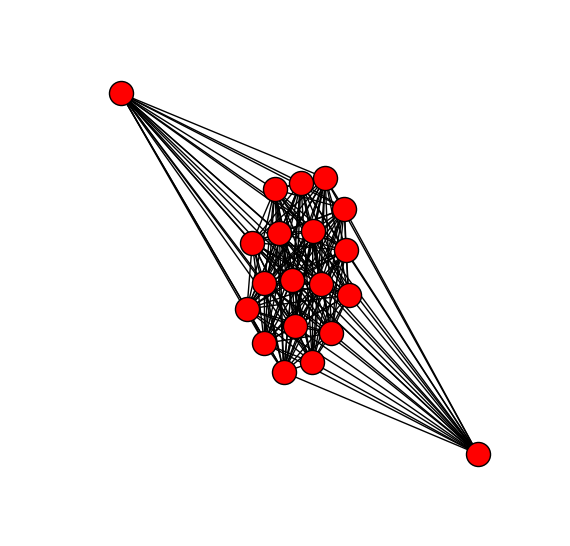

In [51]:
nx.draw(nx.complete_graph(20))
plt.show()

We can verify that the graph is fully connected by calculating the **density**, which is the ratio of the number of edges to the maximum possible number of edges, and see in this case that it is 1.0:

In [52]:
m = nx.number_of_edges(g)
n = nx.number_of_nodes(g)
print (n)
print (m)
print (n *(n-1)/2)
print (float(m) / (n * (n-1)/2.0))

20
190
190.0
1.0


Or, using the built-in function:

In [53]:
nx.density(g)

1.0

## Random Graph
Most graphs contaning information about real phenomena, however, are not fully connected.  A very basic form of network is a random graph (otherwise known as an Erdos-Renyi graph), where edges are formed with a given probability:

_See Newman Chapter 12 for a complete discussion of random graphs and their properties._

Here's a function that implements a version of this that samples from a list of available edges:

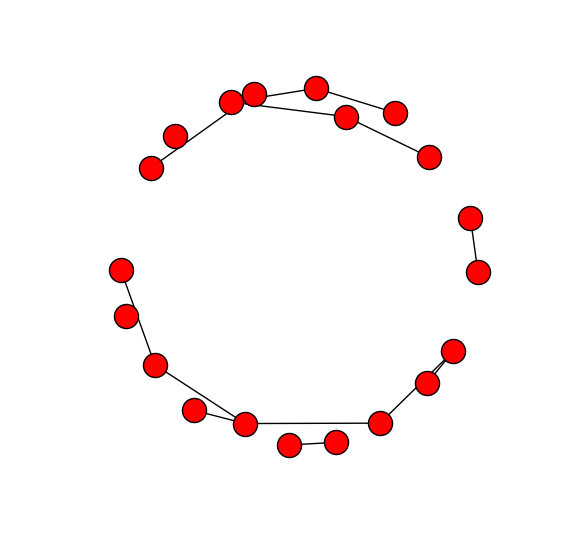

In [54]:
def generate_random_graph(n, p):
    g = nx.Graph()
    g.add_nodes_from([i for i in range(n)])
    m = []
    for i in range(n):
        for j in range(n):
            if (i,j) not in m and [j,i] not in m and i != j:
                m.append([i, j])
    for i in range(int(n*(n-1) / 2)): # Iterate through the nodes and assign an avaialble edge with probabiliy p.
        if rand.random() < p: # This selects a random subset with probability p.
            index = rand.randint(0, len(m)-1)
            g.add_edge(m[index][0], m[index][1])
            del(m[index])
    return g

g = generate_random_graph(20, .1)
nx.draw(g)
plt.show()

This is very similar to the built-in erdos_renyi_graph generation functions. 

http://networkx.github.io/documentation/networkx-1.8.1/reference/generated/networkx.generators.random_graphs.erdos_renyi_graph.html

Experimenting with different values of p, we can see that the graph is fragmented into separate components when p is low.  We can use buil-in networkx functions to get a sense of how density relates to p and to the number of separate components.  Let's check out 50 different probabilities ranging from zero to 1:

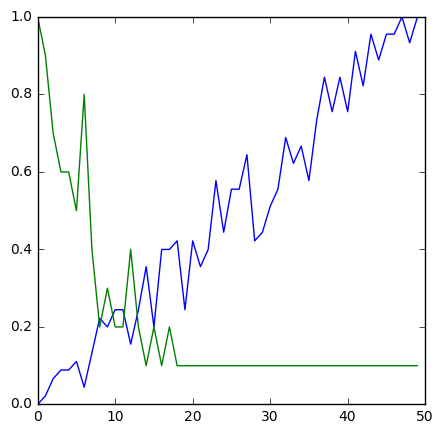

In [55]:
d = []
cc = []
n = 10
for i in range(50):
    p = i / 50.0
    # g = nx.erdos_renyi_graph(n, p)
    g = generate_random_graph(n, p)
    d.append(nx.density(g))
    cc.append(len([c for c in nx.connected_components(g)]) / float(n))
plt.plot(d)
plt.plot(cc)
plt.show()

### Degree

The overall density and number of components of the graph tells us a little bit about the number and distribution of edges, but nothing about how these edges are distributed among nodes.  

One of the key descriptive tools for this is the __degree distribution__.  A node's degree is the number of edges connected to it.  We can access this for a graph using the built-in NetworkX function:

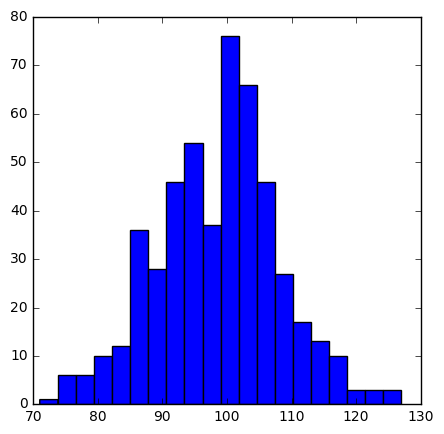

In [56]:
g = nx.erdos_renyi_graph(500, 0.2)  # Note that if we change the value of n and p, the shape of the distribution remains the same.
degree_sequence=nx.degree(g).values()
plt.hist(list(degree_sequence), 20)
plt.show()

Now let's see how this looks compared to some other kinds of networks.  You can see that the distribution varies substantially with the different graph structures.

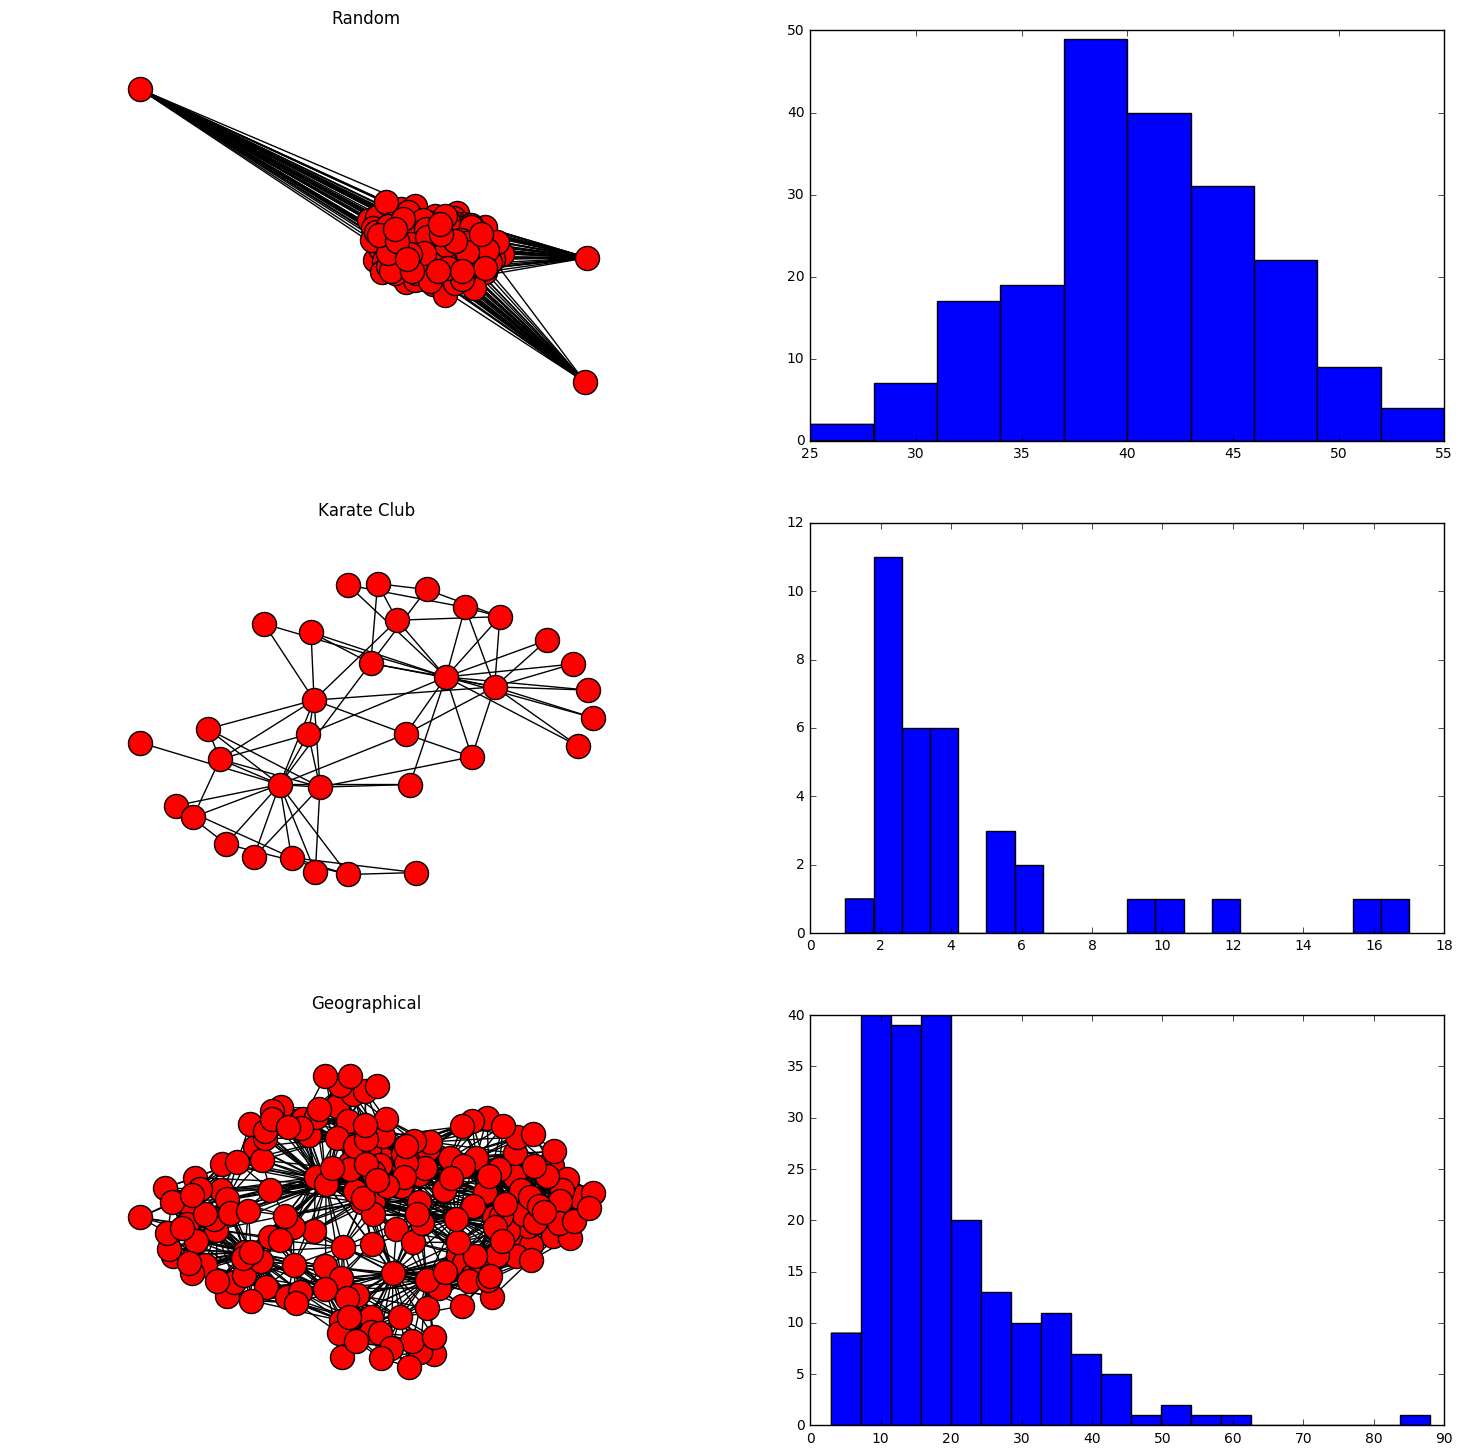

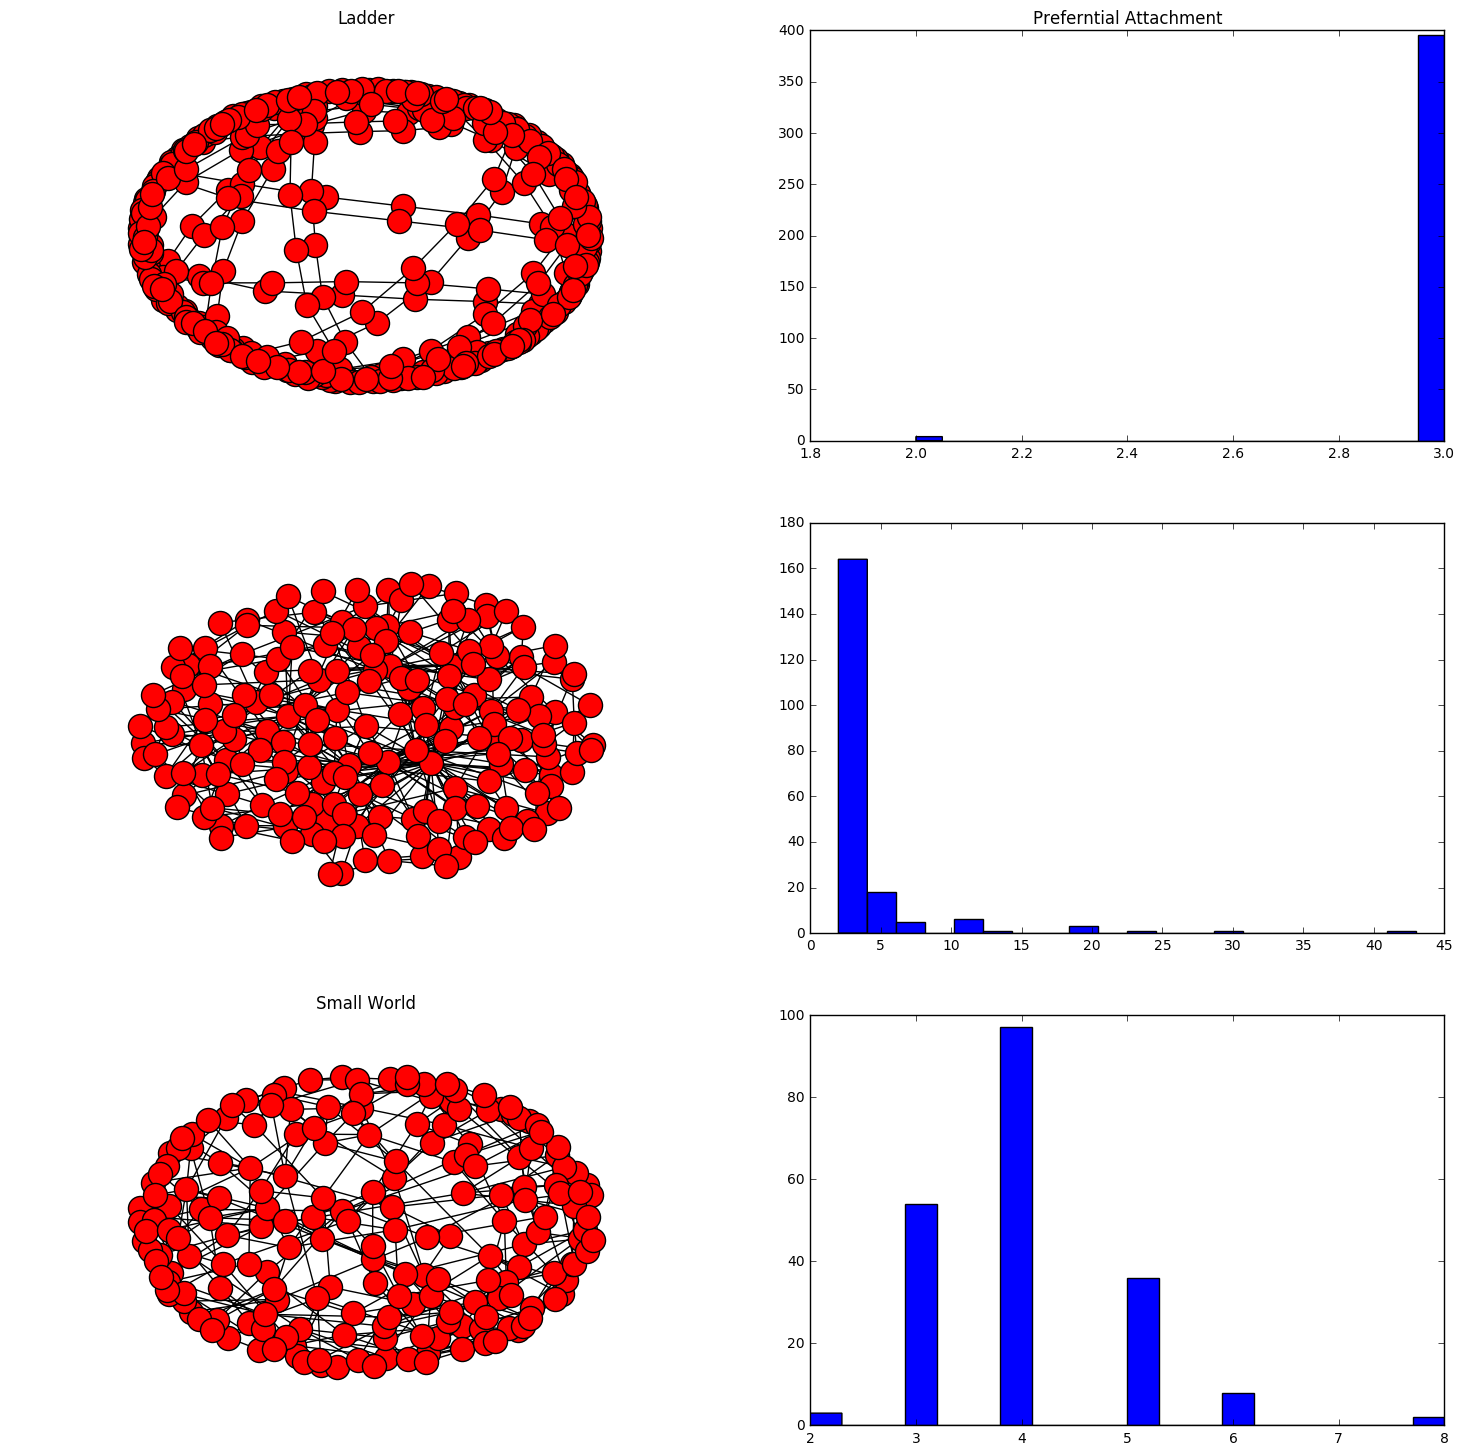

In [57]:
plt.rcParams['figure.figsize'] = (18.0, 18.0)  # This sets the width of the plots.

g = nx.erdos_renyi_graph(200, 0.2) # The first parameter is the number of nodes, the second is the probabilty of an edge
plt.subplot(321)  # Defines a cell in a grid of plots
plt.title("Random")
nx.draw(g) 

plt.subplot(322)
plt.hist(list(nx.degree(g).values()))

g = nx.karate_club_graph() # Fixed social network graph
plt.subplot(323)
plt.title("Karate Club")
nx.draw(g) 

plt.subplot(324)
plt.hist(list(nx.degree(g).values()), 20)

g = nx.geographical_threshold_graph(200, 50) # Graph created by setting node distance threshold
plt.subplot(325)
plt.title("Geographical")
nx.draw(g)

plt.subplot(326)
plt.hist(list(nx.degree(g).values()), 20)
plt.show()

g = nx.ladder_graph(200)
plt.subplot(321)
plt.title("Ladder")
nx.draw(g)

plt.subplot(322)
plt.hist(list(nx.degree(g).values()), 20)

g = nx.barabasi_albert_graph(200, 2)  # Preferential attachment; second parameter is number of edges per node
plt.title("Preferntial Attachment")
plt.subplot(323)
nx.draw(g)

plt.subplot(324)
plt.hist(list(nx.degree(g).values()), 20)

g = nx.nx.connected_watts_strogatz_graph(200, 4, 0.2)  # Small world - third parameter is probability of random attachment
plt.subplot(325)
plt.title("Small World")
nx.draw(g)

plt.subplot(326)
plt.hist(list(nx.degree(g).values()), 20)

plt.show()

## Graph with preferential attachment
Most real-world networks don't form randomly.  For example, in social networks, links tend to form with nodes that have more links (your friends tend to have more friends than you do!)

See Newman p. 498 for a more complete algorithm for generating a preferential attachment graph.  Here is a simple approximation.  You can see in this example that most nodes have few connections, but a few have many connections, in contrast to the random graph.

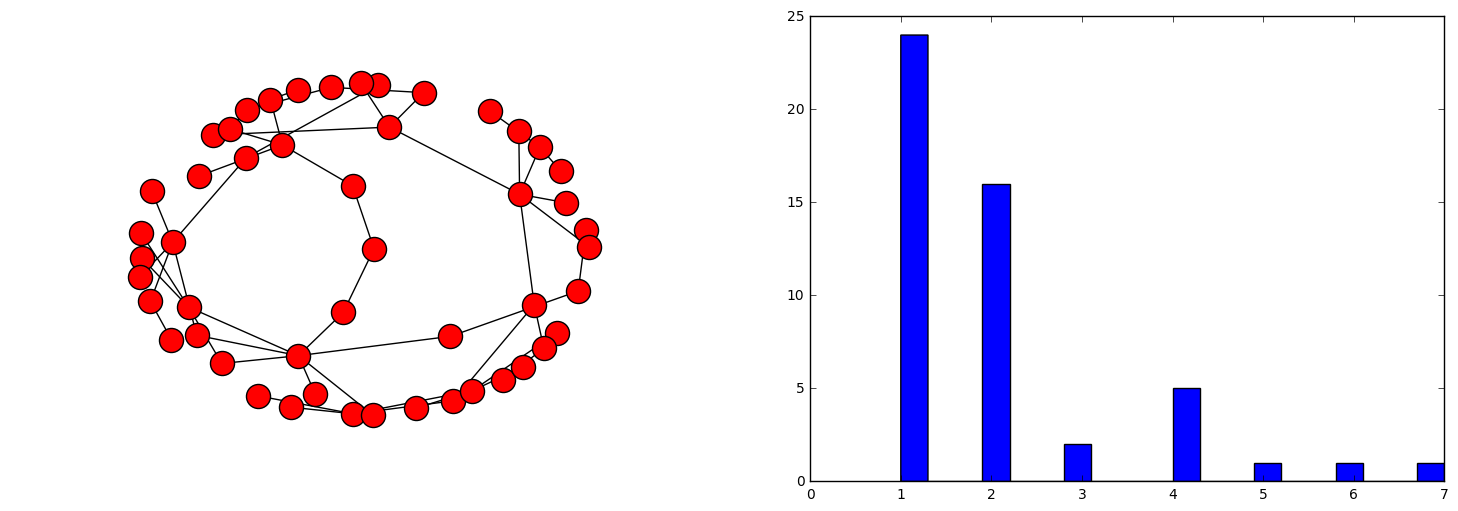

In [58]:
plt.rcParams['figure.figsize'] = (18.0, 6.0)  
g = nx.Graph()
n = 50
g.add_nodes_from(range(n))

candidate_node_list = list(range(n))
node_list = range(n)
for i in node_list:
    # Sampling from a list of nodes, two for every edge formed, will increase the dominance of eges with nodes.
    found = False
    while not found:
        j = candidate_node_list[rand.randint(0, len(candidate_node_list)-1)]
        if (not g.has_edge(i, j)) and (i != j):
            g.add_edge(i, j)
            candidate_node_list.append(j)
            found = True

plt.subplot(121)
nx.draw(g)
plt.subplot(122)
plt.hist(sorted(nx.degree(g).values(),reverse=True), 20)
plt.show()

This is somewhat similar to the barabasi-albert graph:

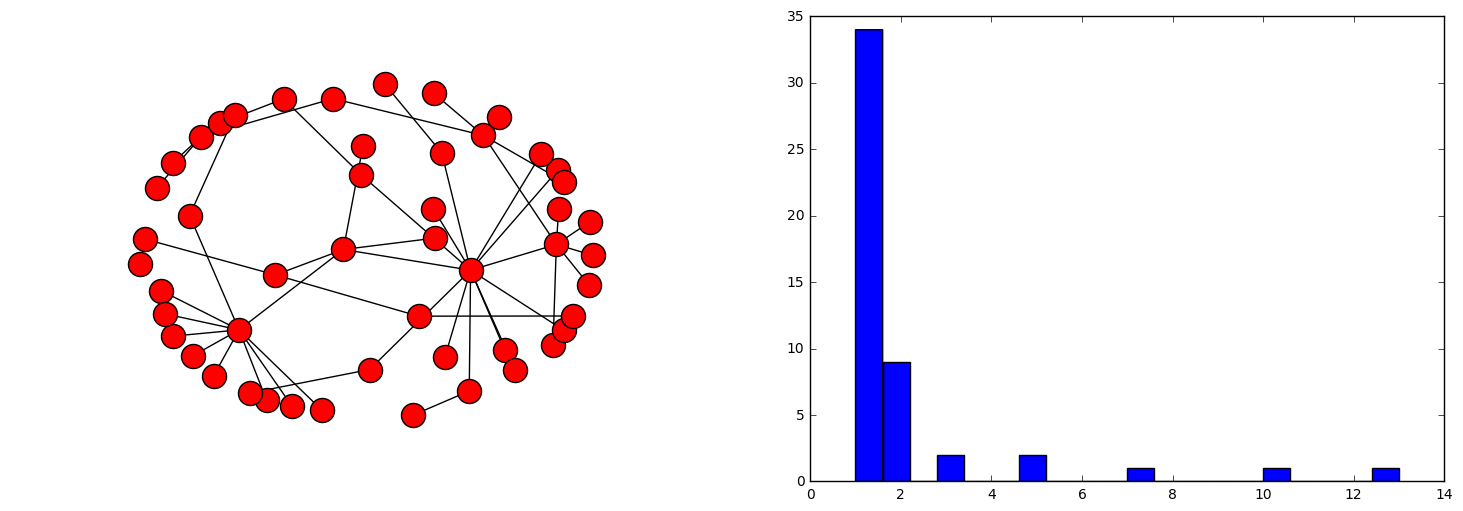

In [59]:
plt.rcParams['figure.figsize'] = (18.0, 6.0)  
g =nx.barabasi_albert_graph(50, 1)
plt.subplot(121)
nx.draw(g)
plt.subplot(122)
plt.hist(sorted(nx.degree(g).values(),reverse=True), 20)
plt.show()

### Small World Networks

One thing that this kind of preferential attachment doesn't capture, is the tendency in some domains for edges to form between nodes that are adjacent to nodes that are connected.  For example, I am more likely to become acquainted with the a friend of my friend than with a random stranger.  At the same time, random aquaintances do form.

Small-world networks capture this behavior by first connecting adjacent nodes, then the nodes adjacent to those, in addition to random connections, as described here:

http://networkx.github.io/documentation/networkx-1.9/reference/generated/networkx.generators.random_graphs.watts_strogatz_graph.html#networkx.generators.random_graphs.watts_strogatz_graph

https://en.wikipedia.org/wiki/Small-world_network

Newman p. 552 has a succinct description of the algorithm.

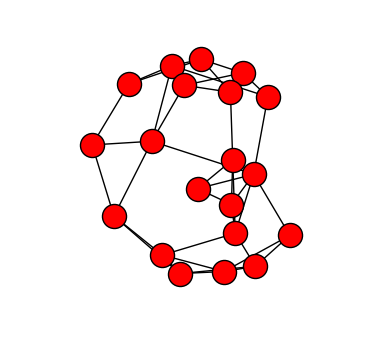

In [60]:
plt.rcParams['figure.figsize'] = (3, 3)  
g = nx.connected_watts_strogatz_graph(20, 4, .1)  # The last parameter is the probability of a random connection.
nx.draw(g)
plt.show()

### Clustering Coefficient

This kind of structure can be captured by the clustering coefficient, which captures, how many of each nodes neighbors could be connected are connected:

https://networkx.github.io/documentation/networkx-1.10/reference/generated/networkx.algorithms.cluster.clustering.html

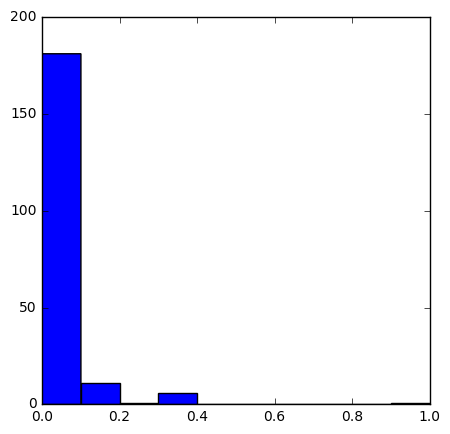

In [61]:
plt.rcParams['figure.figsize'] = (5, 5)  
# Note that, as we change the third parameter, the probability of making a random connection, 
# the clustering coefficient goes down.
g = nx.connected_watts_strogatz_graph(200, 4, 1)
plt.hist(list(nx.clustering(g).values()))
plt.show()

So far we've looked at three ways of generating graphs - random, preferential attachment, and small world.  There are many others, and when considering representing data in a network format, it can be useful to think of the way in which the network is formed to help shed light on which metrics might be the most relevant.

### Path-Based Attributes

Graph traversal algrorithms allow us to quantify attributes of paths within a graph. A workhorse algorithm for this purpose is breadth-first search, described, for example here:  https://www.youtube.com/watch?v=ZDpaXRvUOSQ


This also allows us to find the minimum distance between any two pairs of nodes in a connected graph or graph component.  The calculation can include a distance parameter or not.

0.237
[1, 7, 10]
2
[1, 4, 10]


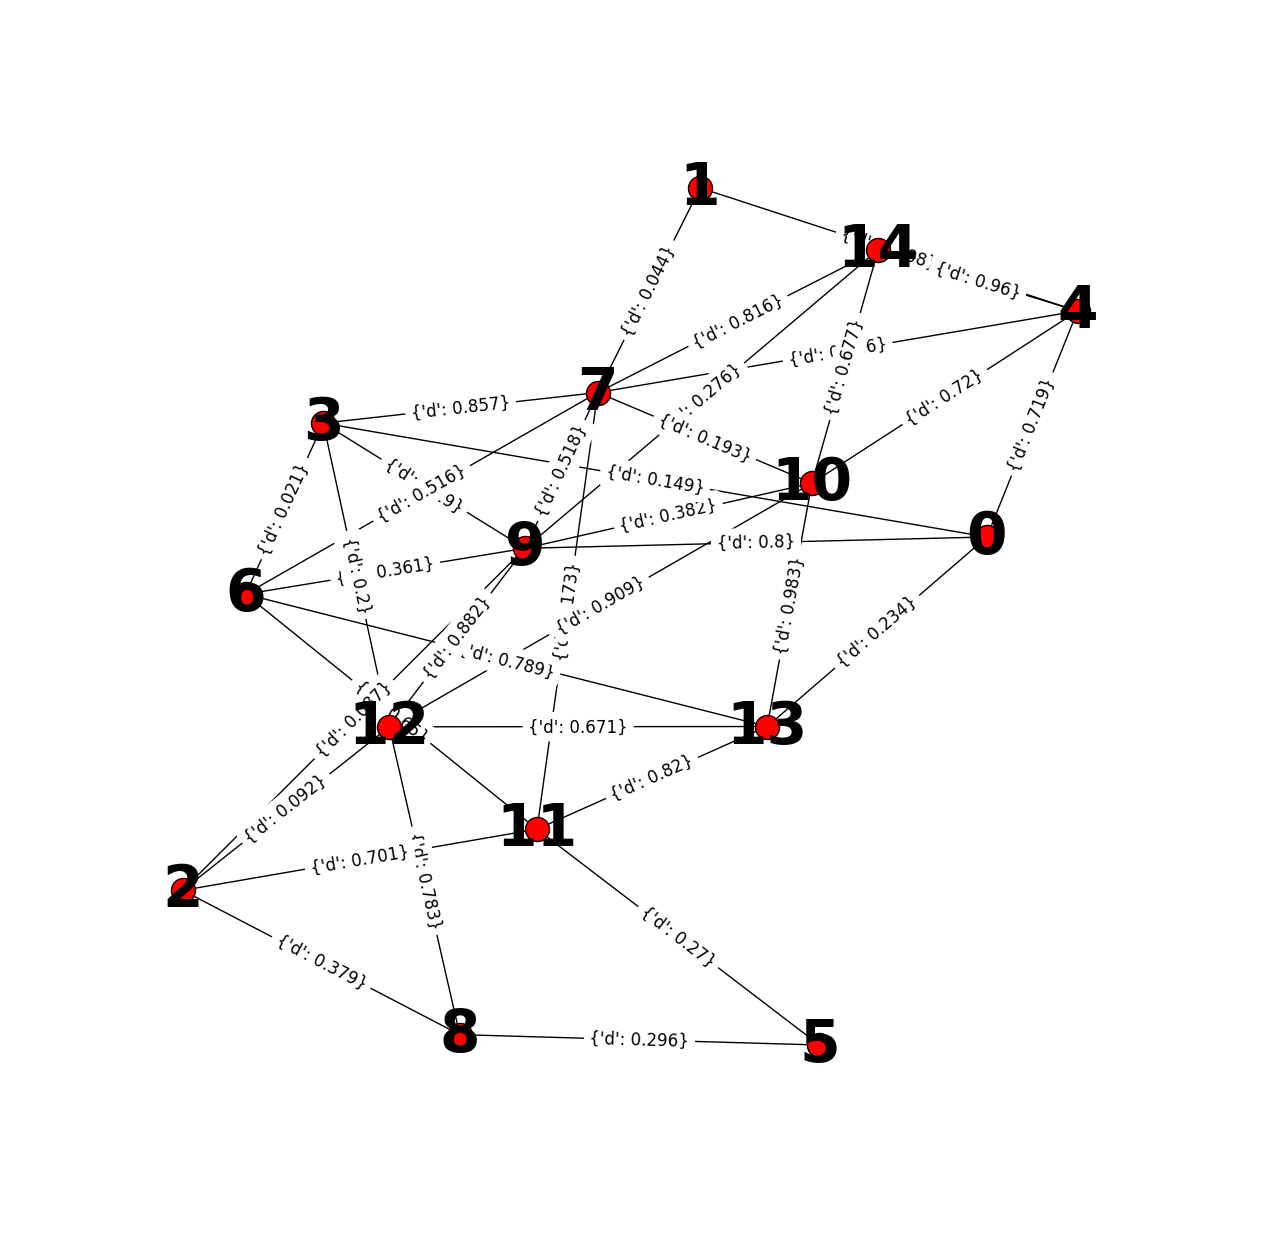

In [64]:
plt.rcParams['figure.figsize'] = (12.0, 12.0) 

import networkx as nx
import random as rand
import pylab as plt  # Required for drawing

g = nx.Graph()
n = 15
p = 0.4
g.add_nodes_from([i for i in range(n)])

for u in range(n):
    for v in range(u+1,n):
        if rand.random() < p:
            g.add_edge(u,v, d=round(rand.random(), 3))

# Path length and shortest path can be calculated using a distance or cost (default is 1).
print (nx.shortest_path_length(g, source=1, target=10, weight="d"))
print (nx.shortest_path(g, source=1, target=10, weight="d"))
print (nx.shortest_path_length(g, source=1, target=10))
print (nx.shortest_path(g, source=1, target=10))
pos = (nx.spring_layout(g))
nx.draw(g, pos, with_labels=True, font_size=42, font_weight="bold")
edge_labels = nx.get_edge_attributes(g,'d')
nx.draw_networkx_edge_labels(g, pos, labels=edge_labels, font_size=12)
plt.show()

### Centrality

From this we can also derive several useful measures of a graph's structure:

<ul>
<li>The average shortest path</li>
<li>The longest shortest path (the diameter)</li>
<li>Which nodes are closest to all other nodes (closeness centrality)</li>
<li>Which nodes or edges are included in the most shortest paths (betweenness centrality)</li>
</ul>

More information on some of these centrality measures is availble here:

https://sites.google.com/site/networkanalysisacourse/schedule/an-introduction-to-centrality-measures   


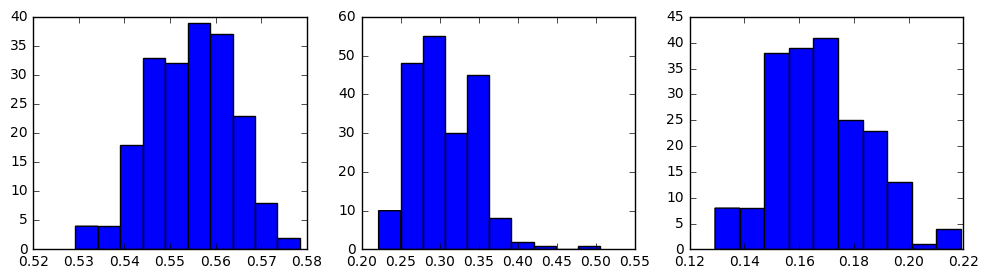

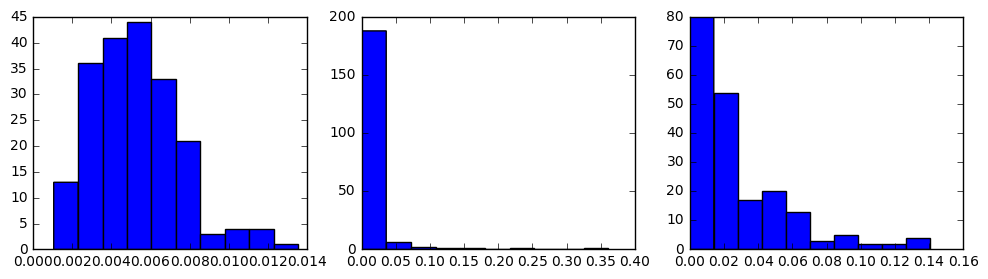

In [77]:
plt.rcParams['figure.figsize'] = (12.0, 3.0) 
plt.subplot(131)
plt.hist(list(nx.closeness_centrality(nx.erdos_renyi_graph(200, .2)).values()))
plt.subplot(132)
plt.hist(list(nx.closeness_centrality(nx.barabasi_albert_graph(200, 2)).values()))
plt.subplot(133)
plt.hist(list(nx.closeness_centrality(nx.connected_watts_strogatz_graph(200, 4, 0.1)).values()))
plt.show()

plt.subplot(131)
plt.hist(list(nx.betweenness_centrality(nx.erdos_renyi_graph(200, .1)).values()))
plt.subplot(132)
plt.hist(list(nx.betweenness_centrality(nx.barabasi_albert_graph(200, 2)).values()))
plt.subplot(133)
plt.hist(list(nx.betweenness_centrality(nx.connected_watts_strogatz_graph(200, 4, 0.1)).values()))
plt.show()

While these overall distributions vary with the type of graph, often we are more interested in the attributes of a specific node.  To help quantify this, it can be useful to add node metrics as node attributes, then use these to control the graph output. For example:

In [78]:
g = nx.erdos_renyi_graph(20, 0.1)
# g = nx.barabasi_albert_graph(20, 5)
# g = nx.connected_watts_strogatz_graph(20, 4, 0.2)
nx.set_node_attributes(g, 'degree', nx.degree(g))
nx.set_node_attributes(g, 'betweenness', nx.betweenness_centrality(g))
nx.set_node_attributes(g, 'closeness', nx.closeness_centrality(g))

We can then use these values in the graph diagram:

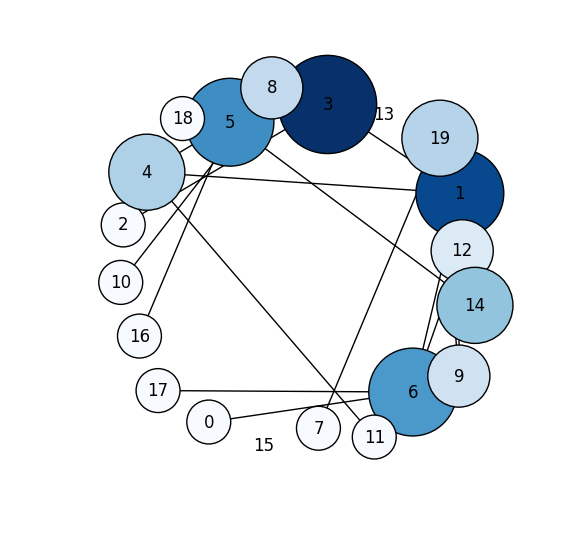

In [79]:
plt.rcParams['figure.figsize'] = (5.0, 5.0) 
pos=nx.spring_layout(g, k=1, iterations=20)
node_sizes = [n[1]["degree"] * 1000 for n in g.nodes(data=True)]
node_colors = [n[1]["betweenness"] * 100 for n in g.nodes(data=True)]
# node_colors = [n[1]["closeness"] * 100 for n in g.nodes(data=True)]
nx.draw(g,pos,node_color=node_colors,node_size=node_sizes,cmap=plt.cm.Blues, with_labels=True)
plt.show()

It can be interesting to see what the most and least central nodes are based on these measures:

In [80]:
d = sorted(g.nodes(data=True),  key=lambda x: x[1]["degree"], reverse=True)
print ("Nodes with the most and least connections: " + str(d[0]) + "; " + str(d[-1]))

d = sorted(g.nodes(data=True),  key=lambda x: x[1]["betweenness"], reverse=True)
print ("Nodes with the highest and lowest betweenness: " + str(d[0]) + "; " + str(d[-1]))

d = sorted(g.nodes(data=True),  key=lambda x: x[1]["closeness"], reverse=True)
print ("Nodes with the highest and lowest closeness: " + str(d[0]) + "; " + str(d[-1]))

Nodes with the most and least connections: (3, {'betweenness': 0.3562378167641325, 'degree': 5, 'closeness': 0.42251461988304095}); (15, {'betweenness': 0.0, 'degree': 0, 'closeness': 0.0})
Nodes with the highest and lowest betweenness: (3, {'betweenness': 0.3562378167641325, 'degree': 5, 'closeness': 0.42251461988304095}); (18, {'betweenness': 0.0, 'degree': 1, 'closeness': 0.2925101214574899})
Nodes with the highest and lowest closeness: (1, {'betweenness': 0.3235867446393762, 'degree': 4, 'closeness': 0.4473684210526316}); (15, {'betweenness': 0.0, 'degree': 0, 'closeness': 0.0})


### Other Measures

Another family of measures worth mentioning are based on adjacency matrices, where rows and columns represent vertices, and cells represent egdes.

https://en.wikipedia.org/wiki/Adjacency_matrix

If you consider each row to be analagous to a feature vector in machine learning applications, you can see how the network structure can be used to, for example, cluster similar nodes together by deriving distance measurements such as cosine similarity, correlation coefficient, or Euclidean distance, from rows the adjacency matrix.

One important additional network metric based on this is __Assortativity__, that is, the extent to which nodes that have similar attributes are connected.  This can be expressed as a ratio between the number of connections within a group, and the number of expected connections if the edges were randomly distributed between nodes.

Social stratification, by, for example, age, can result in assortative mixing in a network.

https://networkx.github.io/documentation/networkx-1.9.1/reference/generated/networkx.algorithms.assortativity.attribute_assortativity_coefficient.html#networkx.algorithms.assortativity.attribute_assortativity_coefficient

### Summary

Let's wrap this up by first creating a function that displays some key metrics across a few sample graphs:

In [81]:
def summarize(g):
    return [round(x, 2) for x in [nx.diameter(g), nx.average_shortest_path_length(g), 
                                  sorted(nx.degree(g).values(),reverse=True)[0],
                                  nx.density(g), nx.average_clustering(g)]]

print ("Diameter, Average shortest path, Average degree, Maximum degree, Density, Average clustering")
print (str(summarize(nx.erdos_renyi_graph(50, 0.2))))
print (str(summarize(nx.erdos_renyi_graph(50, 0.5))))
print (str(summarize(nx.erdos_renyi_graph(50, 0.9))))

print ("\nDiameter, Average shortest path, Average degree, Maximum degree, Density, Average clustering")
print (summarize(nx.barabasi_albert_graph(50, 2)))
print (summarize(nx.barabasi_albert_graph(50, 4)))
print (summarize(nx.barabasi_albert_graph(50, 6)))

print ("\nDiameter, Average shortest path, Average degree, Maximum degree, Density, Average clustering")
print (summarize(nx.connected_watts_strogatz_graph(50, 4, 0.1)))
print (summarize(nx.connected_watts_strogatz_graph(50, 4, 0.5)))
print (summarize(nx.connected_watts_strogatz_graph(50, 4, 0.9)))


Diameter, Average shortest path, Average degree, Maximum degree, Density, Average clustering
[3, 1.85, 21, 0.22, 0.23]
[2, 1.5, 31, 0.5, 0.5]
[2, 1.11, 48, 0.89, 0.89]

Diameter, Average shortest path, Average degree, Maximum degree, Density, Average clustering
[5, 2.6, 21, 0.08, 0.19]
[3, 2.08, 21, 0.15, 0.26]
[3, 1.87, 28, 0.22, 0.32]

Diameter, Average shortest path, Average degree, Maximum degree, Density, Average clustering
[7, 3.44, 6, 0.08, 0.32]
[5, 2.91, 7, 0.08, 0.1]
[6, 2.94, 7, 0.08, 0.11]


We can also look at graph metrics in action here:

http://gis.foundationcenter.org/networkxd3/city_subject_trends.html

### References

Newman, Mark. Networks: an introduction. Oxford University Press, Oxford, 2010.